# The very complex function

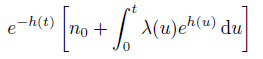

## where:

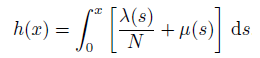

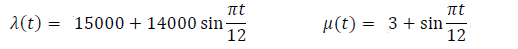

N = 1000, n0 = 832.0746149

# Importing and preparing the data

In [1]:
import pandas as pd

# Import data
data = pd.read_csv('periodicDay2.csv')

# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

# Make data a numpy array
data = data.values

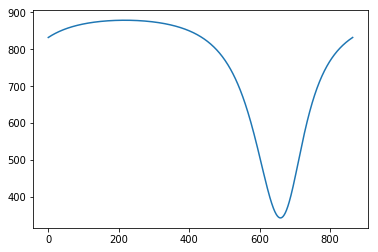

In [3]:
import matplotlib.pyplot as pyplot
pyplot.plot(data[:, 1])

# Preparing training and test data

In [4]:
import numpy as np

# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

# Data scaling

In [5]:
# Build X(t) and Y(x)
X_train = data_train[:, 0]
y_train = data_train[:, 1]
X_test = data_test[:, 0]
y_test = data_test[:, 1]

X_train = (X_train - data[:,0].mean()) / data[:,0].std()
y_train = (y_train - data[:,1].mean()) / data[:,1].std()
X_test = (X_test - data[:,0].mean()) / data[:,0].std()
y_test = (y_test - data[:,1].mean()) / data[:,1].std()

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Placeholders

In [6]:
import tensorflow as tf

input_dim = 1

# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])
Y = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])

d:\program files\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Initializers

In [7]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)  #[-sqrt(3 * scale / n), sqrt(3 * scale / n)]
bias_initializer = tf.zeros_initializer()

# Layers

## Parameters

In [8]:
# Model architecture parameters
n_neurons_1 = 200
n_target = 1
# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([input_dim, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_1, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

## Designing the network architecture

In [9]:
# Hidden layer
hidden_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))

# Output layer
out = tf.add(tf.matmul(hidden_1, W_out), bias_out)

# Loss Function

In [10]:
# Loss function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer

In [11]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Training

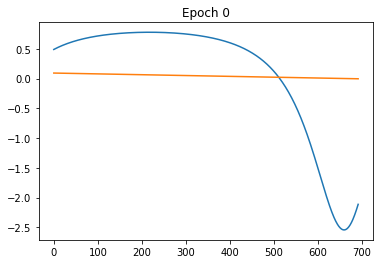

1.0204712


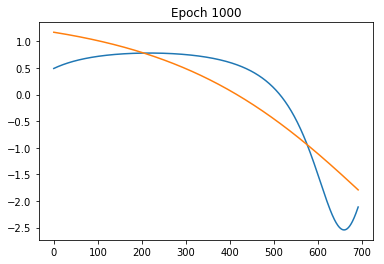

0.22285494


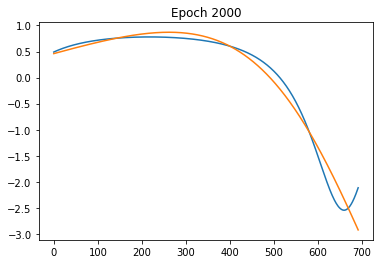

0.02507706


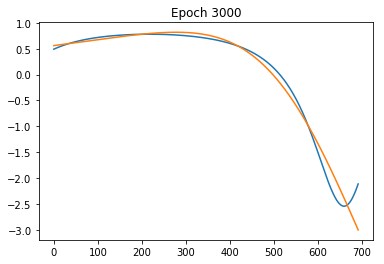

0.021102699


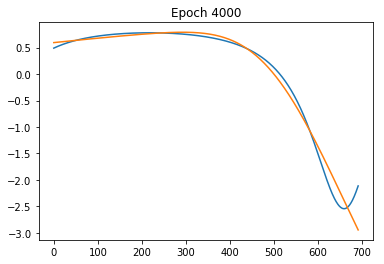

0.018074028


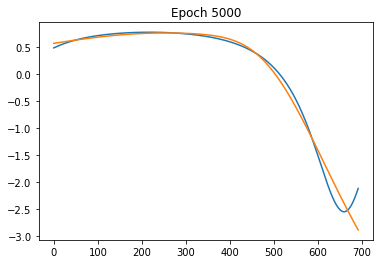

0.014439583


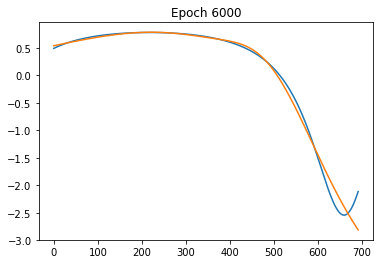

0.011229971


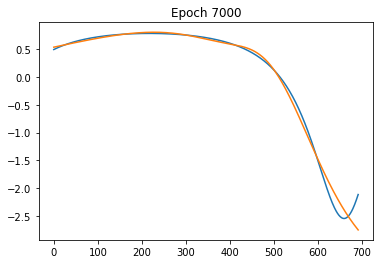

0.009304463


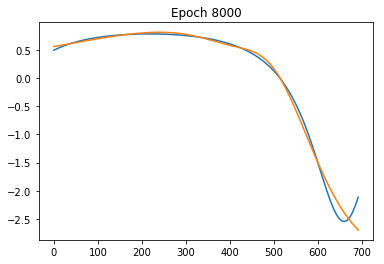

0.007951478


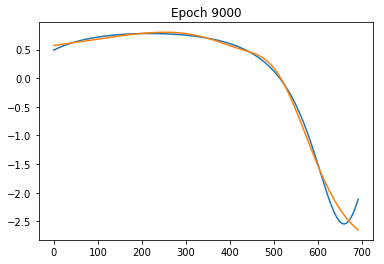

0.0067558372


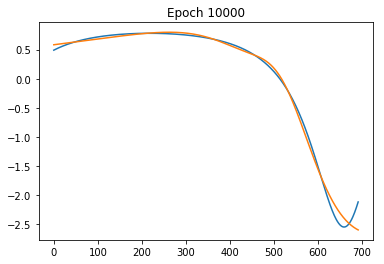

0.0055927336


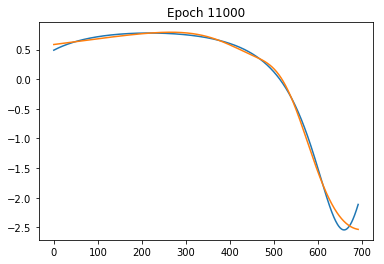

0.004424257


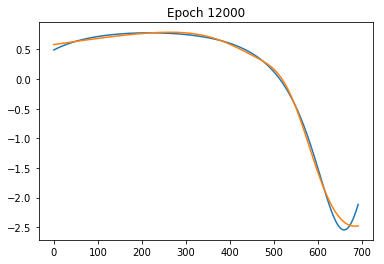

0.0033223545


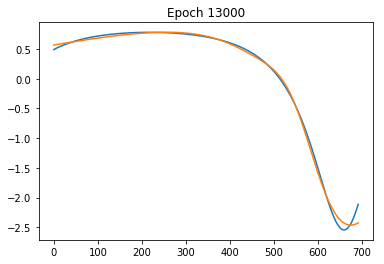

0.0024208934


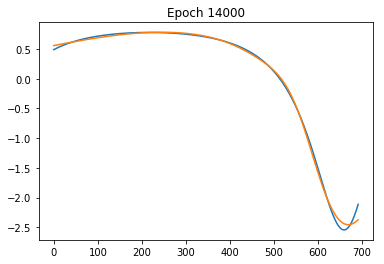

0.0016622824


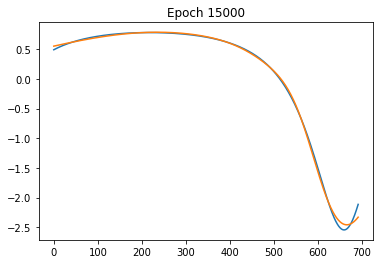

0.001130718


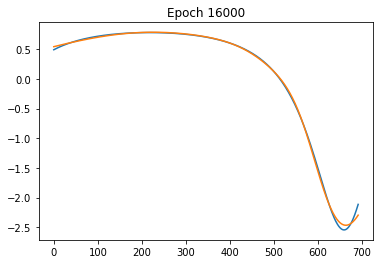

0.00077657425


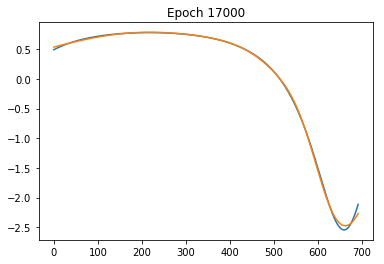

0.000546968


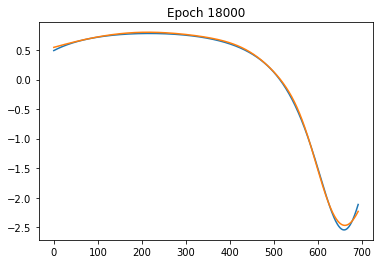

0.00060919597


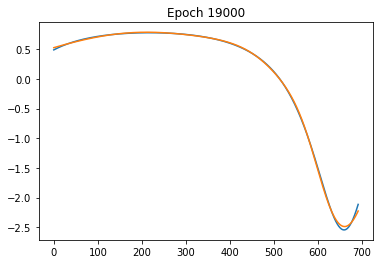

0.0003123925


In [12]:
# Make Session
sess = tf.Session()

# Run initializer
sess.run(tf.global_variables_initializer())

# Number of epochs and batch size
epochs = 20000

for e in range(epochs):
    # Run optimizer
    sess.run(opt, feed_dict={X: X_train, Y: y_train})

    # Show progress
    if np.mod(e, 1000) == 0:
        # Prediction
        pyplot.ion()
        fig = pyplot.figure()
        ax1 = fig.add_subplot(111)
        line1, = ax1.plot(y_train)
        pred = sess.run(out, feed_dict={X: X_train})
        line2, = ax1.plot(pred[:,0])
        pyplot.title('Epoch ' + str(e))
        file_name = 'img3/epoch_' + str(e) + '.jpg'
        pyplot.savefig(file_name)
        pyplot.pause(0.01)
            
        # Print final MSE after Training
        mse_final = sess.run(mse, feed_dict={X: X_train, Y: y_train})
        print(mse_final)

# Evaluation

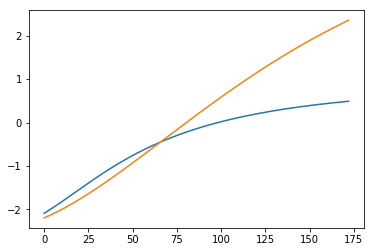

In [13]:
pyplot.ion()
fig = pyplot.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
pred = sess.run(out, feed_dict={X: X_test})
line2, = ax1.plot(pred[:,0])
pyplot.show()

In [14]:
X_train = data[:, 0]
y_train = data[:, 1]

X_train = (X_train - data[:,0].mean()) / data[:,0].std()
y_train = (y_train - data[:,1].mean()) / data[:,1].std()

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

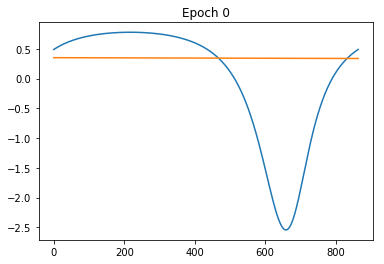

1.1143229


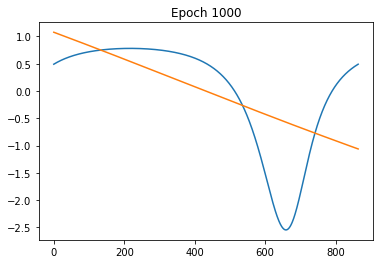

0.6143406


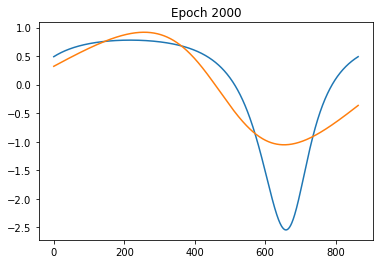

0.28726223


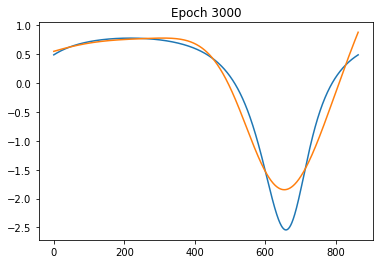

0.05430732


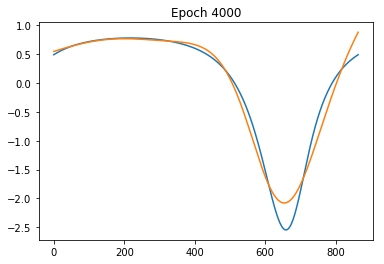

0.027424373


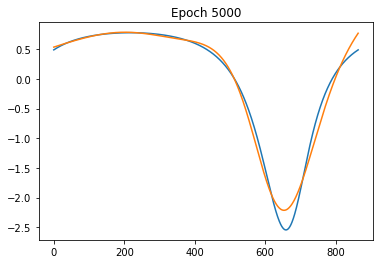

0.014466027


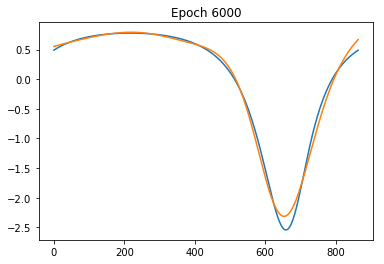

0.0072817053


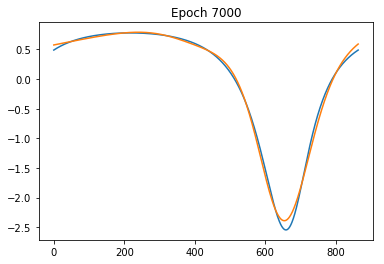

0.003643973


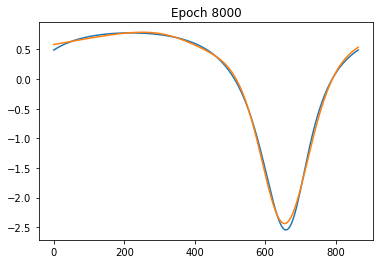

0.0019597525


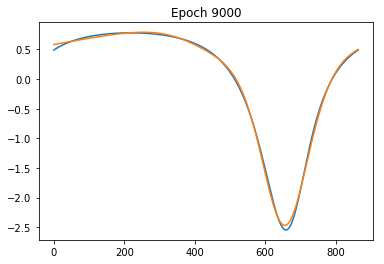

0.0011861293


In [15]:
# Make Session
sess = tf.Session()

# Run initializer
sess.run(tf.global_variables_initializer())

# Number of epochs and batch size
epochs = 10000

for e in range(epochs):
    # Run optimizer
    sess.run(opt, feed_dict={X: X_train, Y: y_train})

    # Show progress
    if np.mod(e, 1000) == 0:
        # Prediction
        pyplot.ion()
        fig = pyplot.figure()
        ax1 = fig.add_subplot(111)
        line1, = ax1.plot(y_train)
        pred = sess.run(out, feed_dict={X: X_train})
        line2, = ax1.plot(pred[:,0])
        pyplot.title('Epoch ' + str(e))
        file_name = 'img3/epoch_' + str(e) + '.jpg'
        pyplot.savefig(file_name)
        pyplot.pause(0.01)
            
        # Print final MSE after Training
        mse_final = sess.run(mse, feed_dict={X: X_train, Y: y_train})
        print(mse_final)